In [5]:
import os
import sys

sys.path.append('..')

from src.mutation import Mutation
from src.sequence import Plasmid
from src.eblocks import Eblocks, EblockDesign
from src.primer import DesignPrimers
from src.plot import Plot
from src.utils import Utils, SnapGene

%reload_ext autoreload
%autoreload 2

ImportError: cannot import name 'EblockDesign'

In [2]:
# Create a Mutation object and parse the input mutations from the files/ directory

mutations_file = 'files/mutations.txt'

mutation_instance = Mutation()
mutation_instance.parse_mutations(mutations_file)

# Print the mutations that were parsed

mutation_instance.print_mutations()

The selected mutations are:
	Mutation	G432E
	Mutation	R436Q
	Mutation	I451A
	Mutation	A484S
	Mutation	K562A
	Mutation	I569V
	Mutation	L584V
	Mutation	T595S
	Mutation	D599Y
	Mutation	P618D
	Mutation	N677H
	Mutation	Q722V
	Insert	A770-PLR
	Mutation	D773E
	Mutation	K922R
	Mutation	E972G
	Mutation	W973S
	Mutation	Q1023R
	Mutation	A1031T
	Mutation	N1034Q
	Mutation	N1038T
	Mutation	S1046N
	Mutation	L1052E
	Mutation	V1086N
	Mutation	R1090A
	Mutation	N1096E


In [3]:
# Create a Plasmid object and parse the input plasmid from the files/ directory

sequence_file = 'files/A0QX55.fasta'
vector_file = 'files/vector.dna'

sequence_instance = Plasmid()
sequence_instance.parse_sequence(sequence_file)
sequence_instance.parse_vector(vector_file)

In [4]:
# Create a SnapGene instance to write the eBlocks features to a snapgene file

# Set output directory
output_dir = 'output'

snapgene_instance = SnapGene(sequence_instance=sequence_instance,
                             output_dir=output_dir)

In [5]:
# Create an Eblocks object based on the input mutations and the gene sequence

# Print some information about the processes
verbose = True  # TODO

eblocks_instance = Eblocks()
design_instance = EblockDesign(eblocks_instance=eblocks_instance,
                               mutation_instance=mutation_instance,
                               sequence_instance=sequence_instance,
                               snapgene_instance=snapgene_instance)

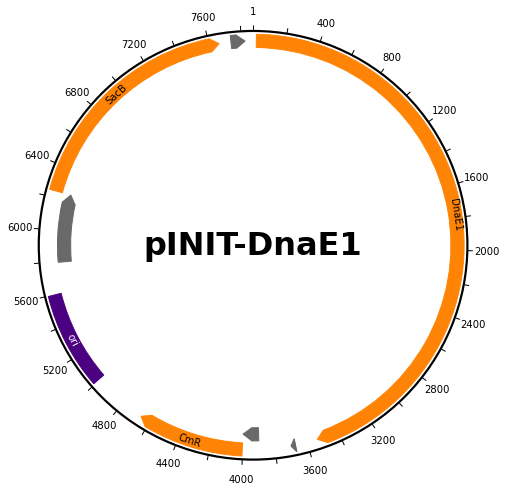

In [6]:
# Create a Plots object and check the input vector

# Create the Plot object
plot_instance = Plot(mutation_instance=mutation_instance,
                     eblocks_design_instance=design_instance,
                     sequence_instance=sequence_instance,
                     output_dir=output_dir)

# Check the input vector
plot_instance.plot_vector(figsize=(7, 7));

In [7]:
# TODO Descibe the vector here, the gene etc

In [12]:
# Now that we have checked our vector, it is time to run the eBlock design process

design_instance.run_design_eblocks()

Starting eBlock design ...
Optimizing based on price per bp ...
Lowest estimated cost: €714.8 (given price per bp of €0.05)
Completed eBlock design.


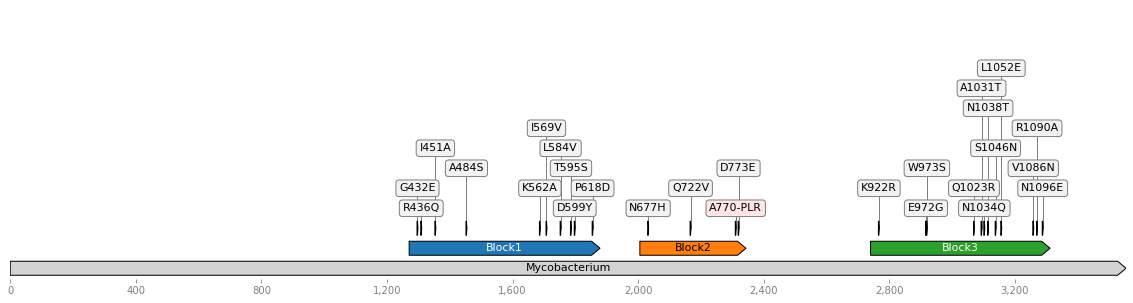

In [13]:
# Now that we have designed the eblocks, we can visualize them using the Plot class

plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

# TODO Get fixed colorscheme for the eBlocks
# TODO Mycobacterium tuberculosis H37Rv rather than Mycobacterium

In [ ]:
# TODO Describe the eblocks here, what you can see with each color etc

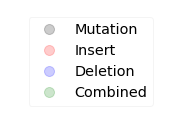

In [30]:
# Each type of mutations (insertions, deletions, substitutions) is represented by a different color, you can see the legend below

plot_instance.plot_mutation_legend()

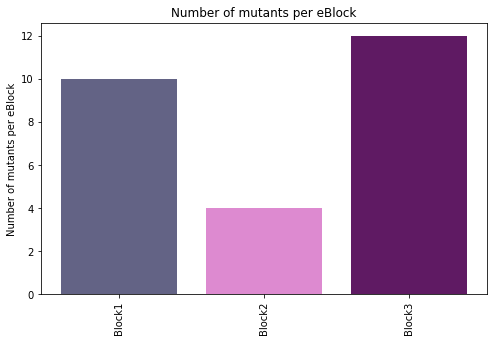

In [31]:
# To see how many mutations can be made in each eBlock, we can plot a histogram

plot_instance.plot_histogram_mutations()

In [ ]:
# TODO Do some explanation here

In [ ]:
# TODO Save the eblocks to a file

In [ ]:
# TODO (At the end of tutorial) Remake the eBlocks but optimize for amount of eBlocks

In [ ]:
for k,v in design_instance.wt_eblocks.items():
    print(k)
    print(v)
    print('\n')

In [ ]:
# Create a primer design object and run the primer design process for IVA primers to amplify the eblocks

primers_instance = DesignPrimers(mutation_instance=mutation_instance,
                                 eblock_instance=eblocks_instance,
                                 eblocks_design_instance=design_instance,
                                 sequence_instance=sequence_instance, 
                                 output_dir=output_dir,
                                 snapgene_instance=snapgene_instance)

primers_instance.run_IVAprimer()

# TODO Save the printed output to a file
# TODO Do not show the data frame here, but save it to a file
# TODO Remove fw_sequence and rv_sequence from df
# TODO Save the begin and end index of the primer on the gene/vector sequence
# TODO Indexes in SnapGene

In [ ]:
# Also design sequencing primers to validate the insertion of the eblocks

primers_instance.run_SEQprimer()

In [ ]:
start_index = 0
occurrences = 0
substring = 'tcatcatcaccaccggatg' # 'ccgaccacggaaacatgttc'
while True:
    # Search for the substring starting from start_index
    index = sequence_instance.vector.seq.find(substring, start_index)
    # If the substring is not found, break the loop
    if index == -1:
        break
    # Increment the count of occurrences
    occurrences += 1
    # Move the start_index to search for the next occurrence
    start_index = index + len(substring)
# Check if multiple occurrences were found
if occurrences > 1:
    print("Multiple occurrences found.")
else:
    print("Only one occurrence found.")

In [ ]:
primers_instance.run_SEQprimer()

In [ ]:
for k, v in design_instance.eblocks.items():
    print(k, v[2], v)